In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
#independent and dependent features
x = df.drop('species',axis=1)
y = df['species']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
# y_test.isnull().sum()

In [16]:
#post prunning method
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(max_depth=5)
treemodel.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
pred = treemodel.predict(x_test)
from sklearn.metrics import accuracy_score , classification_report
score = accuracy_score(y_test, pred)
print(score)
print(classification_report(y_test,pred))


0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



[Text(0.5416666666666666, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.625, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.5833333333333333, 0.8333333333333333, '  False'),
 Text(0.4166666666666667, 0.5833333333333334, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.25, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.5, 0.25, 'x[0] <= 5.8\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.4166666666666667, 0.08333333333333333, 'g

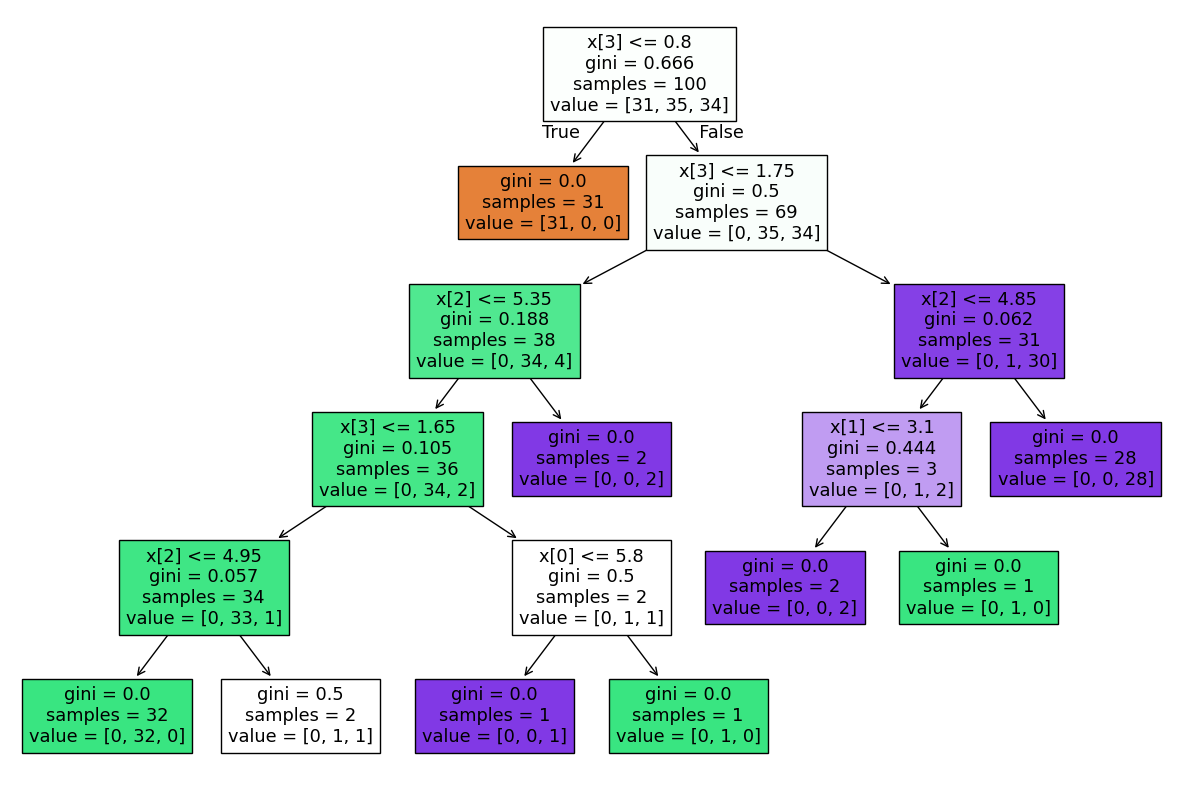

In [18]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)